# The rising cost of Essentials: How does UK food inflation hamper households


#### Food prices have long been a major concern from all households in the United Kingdom, as inflation rises up, consumers will have to bear higher prices for normal goods while remained the same purchase power as pre-inflation period. Even though inflation is a useful and important figure from a different standpoint, it does not directly reflect how price increases affect different segments of society. This Project seeks to discover deeper into UK food price data, and exploring overall trends in food inflation, including how these changes affected people purchasing behaviour across different income groups, for example: the proportion on spending groceries. All the visualization and statistics results were done through analysis multiple datasets download from ONS and Home Office, using regression modelling and other techniques could possibly uncover the patterns that lead to unequal burden of food inflation across the UK.

## Data Preparation and Cleaning

##### Inspecting each of the dataset that is valuable for the analysis, but before we insert the values to plot a visualization, we first have to clean the datasets by using pandas, handling missing values, skip unnecessary rows or columns, converting dates and rename column name. These changes have enable datasets to be more precisely extracted without much care of errors, while some of the dataset has been merged in order to cope with the requirement of some visualizations, such as merging food spending and price inflation could show the potential correlation. Overall, the entire analysis were based on these 6 datasets, which provide valuable resources to build the graph and statistical figures. 

1. Food Index (Excel)
2. CPIH Annual Rate (CSV)
3. Supermarket Price Comparison (source)
4. Median Weekly Earnings (CSV)
5. Household Food Budget proportion (CSV)
6. Detailed Expenditure Trends (Excel)

In [2]:
# Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm                                          # Import for regression model (Part 5)

# Tells the computer to default this as working directory 
os.chdir(r"C:\Users\billc\OneDrive\Desktop\Final Project Data Science")



# ----------------------------------------------------------------------
# Load and read excel file from Food Index dataset
food_data = pd.read_excel("Food_index.xlsx", sheet_name="Food inflation")

# Skip metadata rows and keep only useful statistics for analysis
food_df = food_data.iloc[4:].copy()

# Rename columns title
food_df.columns = ['Date', 'Food Inflation Rate (%)']
food_df = food_df[['Date', 'Food Inflation Rate (%)']]

# Remove missing values that are Nah
food_df.dropna(inplace=True)

# Convert 'Date' and 'Food Inflation' columns into proper data types
food_df['Date'] = pd.to_datetime(food_df['Date'], errors='coerce')
food_df['Food Inflation Rate (%)'] = pd.to_numeric(food_df['Food Inflation Rate (%)'], errors='coerce')
food_df.dropna(inplace=True)                                           # Remove missing values that are Nah

# Align and match dates to the start of the month
food_df['Date'] = food_df['Date'].dt.to_period('M').dt.to_timestamp()



# ----------------------------------------------------------------------
# Load and clean CPIH (Consumer Price Index) dataset
total_CPI = pd.read_csv("CPIH_Annual_rate.csv", skiprows=5)            # Skip unncessary information for data extraction                                   

# Rename columns title
total_CPI.columns = ['Date', 'Overall Consumer Price Index (%)']

# Convert 'Date' and 'Food Inflation' columns into proper data types
total_CPI['Date'] = pd.to_datetime(total_CPI['Date'], errors='coerce')

# Make sure the values from total_CPI are numeric, avoiding unit errors
total_CPI['Overall Consumer Price Index (%)'] = pd.to_numeric(total_CPI['Overall Consumer Price Index (%)'], errors='coerce')
total_CPI.dropna(inplace=True)                                         # Remove missing values that are Nah 

# Align and match dates to the start of the month
total_CPI['Date'] = total_CPI['Date'].dt.to_period('M').dt.to_timestamp()



# ----------------------------------------------------------------------
# Load and read excel file from Weekly Earnings dataset
earnings_df = pd.read_csv("Median_weekly_earnings_for_full-time_employees.csv", skiprows=12)         # Skip unncessary information for data extraction     

# Rename columns title 
earnings_df.columns = ["Year", "Full-Time", "Part-Time", "All"]

# Remove missing values that are Nah
earnings_df.dropna(inplace=True)

# Convert 'Year' into datatime type, in order to ensure consistency 
earnings_df["Year"] = pd.to_datetime(earnings_df["Year"], format="%Y")

# Check and make sure earnings values are numeric
earnings_df["Full-Time"] = pd.to_numeric(earnings_df["Full-Time"], errors = 'coerce')
earnings_df["Part-Time"] = pd.to_numeric(earnings_df["Part-Time"], errors='coerce')
earnings_df["All"] = pd.to_numeric(earnings_df["All"], errors='coerce')



# ----------------------------------------------------------------------
# Load and read excel file from Family Food Spending dataset
family_spending_df = pd.read_csv("Household_food_budget_proportion.csv")

# Check column name 
family_spending_df.columns = [
    "Year",
    "Low Income Food Spend (%)",
    "All Households Food Spend (%)"
]

# Reformat the column 'Year' by removing spaces and convert to datatime type (Using Year as unit)
family_spending_df["Year"] = family_spending_df["Year"].str.strip()
family_spending_df["Year"] = pd.to_datetime(family_spending_df["Year"].str[:4], format="%Y")            

# Ensure python to interpreted as numeric values, not string or boolean 
family_spending_df["Low Income Food Spend (%)"] = pd.to_numeric(family_spending_df["Low Income Food Spend (%)"], errors='coerce')
family_spending_df["All Households Food Spend (%)"] = pd.to_numeric(family_spending_df["All Households Food Spend (%)"], errors='coerce')
family_spending_df.dropna(inplace=True)                                  # Remove missing values that are Nah

# This new and cleaned version replaced the original dataset 
family_spending_df.to_csv("cleaned_family_food_spending.csv", index=False)



# ----------------------------------------------------------------------
# Merge food inflation and CPI for comparsion
merged_inflation = pd.merge(food_df, total_CPI, on="Date", how="inner")
print("\nMerged inflation data:\n", merged_inflation.head(10), "\n")                # Print and review the format of the dataset (10 sample)

# Merge earnings and food share data for income analysis
merged_earnings_foodshare = pd.merge(earnings_df, family_spending_df, on="Year", how="inner")
print("Merged earnings + food share data:\n", merged_earnings_foodshare.head())     # Print and review the format of the dataset


Merged inflation data:
         Date  Food Inflation Rate (%)  Overall Consumer Price Index (%)
0 2013-01-01                      4.2                               2.3
1 2014-01-01                      2.0                               1.5
2 2015-01-01                     -2.5                               0.4
3 2016-01-01                     -2.6                               1.0
4 2017-01-01                     -0.5                               2.6
5 2018-01-01                      3.7                               2.3
6 2019-01-01                      0.9                               1.7
7 2020-01-01                      1.4                               1.0
8 2021-01-01                     -0.7                               2.5
9 2022-01-01                      4.4                               7.9 

Merged earnings + food share data:
         Year  Full-Time  Part-Time    All  Low Income Food Spend (%)  \
0 2018-01-01      568.3      187.3  460.0                       14.7   
1

C:\Users\billc\AppData\Local\Temp\ipykernel_18884\1946329135.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  food_df['Date'] = pd.to_datetime(food_df['Date'], errors='coerce')
C:\Users\billc\AppData\Local\Temp\ipykernel_18884\1946329135.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total_CPI['Date'] = pd.to_datetime(total_CPI['Date'], errors='coerce')


## Overall Consumer Price Index vs Food Prices (Part 1) --> Figure 1

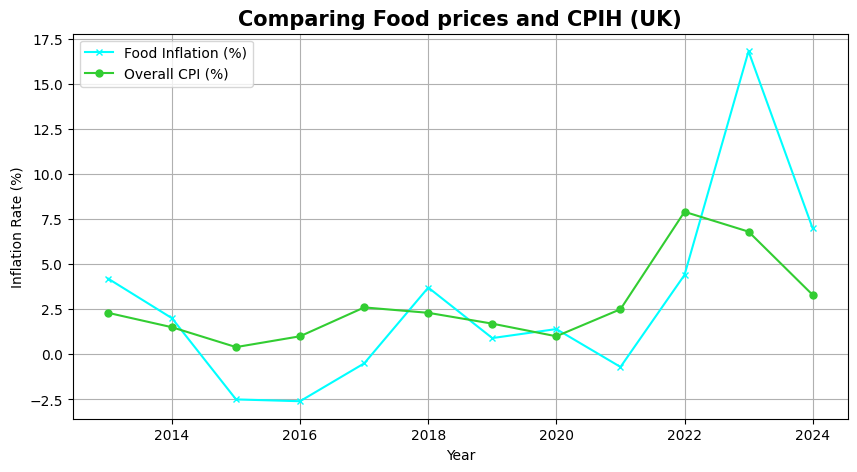

In [3]:
plt.figure(figsize=(10, 5))

# Line plot for Food Price
plt.plot(merged_inflation['Date'], merged_inflation['Food Inflation Rate (%)'], label = 'Food Inflation (%)', marker = 'x', ms = 5, color = 'aqua')

# Line plot for overall CPI
plt.plot(merged_inflation['Date'], merged_inflation['Overall Consumer Price Index (%)'], label = 'Overall CPI (%)', marker = 'o', ms = 5, color = 'limegreen')

# Titles and labels
plt.title('Comparing Food prices and CPIH (UK)', fontsize = 15, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

### Analysis & Findings

##### Figure 1 compares food inflation and overall CPI index (%) in the UK from 2013 to 2024. It is conspicuous that food prices were more volatile than the Overall Price changes in the last decade, while sometimes going negative, meaning prices went cheaper from consumer perspectives. However, in between 2021 and 2023, food inflation have surged to nearly 17% in 2023 as its peak, and CPI index only peaked at 8%. This is because the global pandemic (COVID-19) had struck across the globe, self-isolation and social distancing were implemented by governments to control the spread of the virus, and therefore causing external shocks such as logistics overhaul and escalated fuel cost, which lead to ripple effects on food prices. By the late stage of the pandemic, the general inflation have declined back to level of pre-pandemic period, unfortunately, food prices still remained high. Overall, figure 1 highlights how food cost can outpace general inflation as a whole, and possibly contribute a higher proportion on the daily cost of living across UK households during economic turmoil.

## Food Prices by Supermarket (Part 2) --> Table 1

In [9]:
# Supermarkets Price comparsion (Part 2)

import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
from io import StringIO

# Extract data from selected URL
url = "https://www.which.co.uk/reviews/supermarkets/article/food-price-inflation-tracker-aU2oV0A46tu3"

# Bypassing websites detection as bots to avoid blocked from the webpage
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

# Loop through all tables to find the inflation data
for table in soup.find_all('table'):
    table_html = str(table)
    supermarket_price_df = pd.read_html(StringIO(table_html))[0]            # [0] means get the first values and return it to the table in pandas

    print("🛒 Supermarkets found:", supermarket_price_df["Supermarket"].tolist())


    # Rename columns for improving clarity
    supermarket_price_df.rename(columns={
        "Annual inflation for the three months to end November 2024": "3-Month Avg (%)",
        "Annual inflation for the month of November 2024": "Nov 2024 (%)"
    }, inplace=True)
    
    # Convert percentage strings to float
    supermarket_price_df["3-Month Avg (%)"] = supermarket_price_df["3-Month Avg (%)"].astype(str).str.replace('%', '').astype(float)
    supermarket_price_df["Nov 2024 (%)"] = supermarket_price_df["Nov 2024 (%)"].astype(str).str.replace('%', '').astype(float)

    # Additional info for the table
    supermarket_price_df["Change (%)"] = (supermarket_price_df["Nov 2024 (%)"] - supermarket_price_df["3-Month Avg (%)"]).round(1)
    supermarket_price_df["Rank"] = supermarket_price_df["Change (%)"].rank(ascending=False).astype(int)

    # Sort values for high values to low values
    supermarket_price_df.sort_values(by="Nov 2024 (%)", ascending=False, inplace=True)

    # Save to CSV
    supermarket_price_df.to_csv("supermarket_inflation.csv", index=False)
    print("Saved as 'supermarket_inflation.csv'")

    # Display table
    print("\nSupermarket Inflation Comparison:")
    print(tabulate(supermarket_price_df, headers='keys', tablefmt='fancy_grid', stralign="center", showindex=False))
    break


🛒 Supermarkets found: ['Aldi', 'Tesco', 'Asda', 'Lidl', "Sainsbury's", 'Morrisons', 'Ocado']
Saved as 'supermarket_inflation.csv'

Supermarket Inflation Comparison:
╒═══════════════╤═══════════════════╤════════════════╤══════════════╤════════╕
│  Supermarket  │   3-Month Avg (%) │   Nov 2024 (%) │   Change (%) │   Rank │
╞═══════════════╪═══════════════════╪════════════════╪══════════════╪════════╡
│     Aldi      │               3.5 │            4.1 │          0.6 │      1 │
├───────────────┼───────────────────┼────────────────┼──────────────┼────────┤
│     Tesco     │               3.6 │            4   │          0.4 │      3 │
├───────────────┼───────────────────┼────────────────┼──────────────┼────────┤
│     Asda      │               3.6 │            3.7 │          0.1 │      5 │
├───────────────┼───────────────────┼────────────────┼──────────────┼────────┤
│     Lidl      │               4   │            3.7 │         -0.3 │      6 │
├───────────────┼───────────────────┼────────

### Analysis & Findings

##### In Table 1, we can see a preview of food inflation trends in the UK across major supermarkets, as well as the November 2024 food inflation rate, along with information about how food prices have changed over this time period. Aldi's average price went up by 4.1%, while Tesco's went up by 4%. During the last quarter of 2024, both supermarkets had consistently rising prices, with Aldi raising 0.6% from its three-month average and Tesco elevating 0.4%, making them the two fastest-rising supermarket chains in the industry.

##### Ocado displayed a small increase, 0.5% lower to be exact; however, it stayed well under the total in both absolute terms and in relation to the other supermarkets. At the same time, Lidl and Morrisons actually experienced a drop in inflation, indicating either some price adjustments or great discounts. 

##### In conclusion, Aldi and Tesco remain the overall leaders in price growth; Waitrose surprisingly accedes to the recent momentum of price growth, illustrating its pricing strategy change potential. Alternatively, Lidl and Morrisons possibly give some relief and soften inflation amid the continual cost-of-living pressures.




## Weekly Median Earnings: Full-Time vs Part-Time (Part 3) --> Figure 2

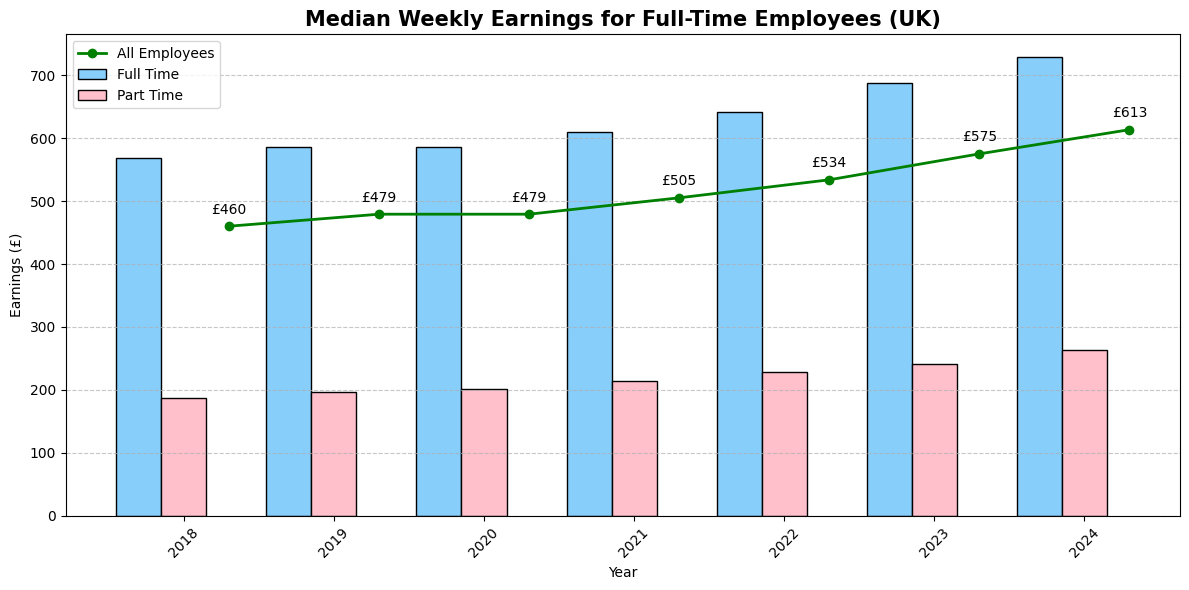

In [5]:
# Median of Weekly Earnings for employees (FULL TIME VS PART TIME) (Part 3) 

# Configure the title of x-axis to be "Year"
earnings_years =earnings_df["Year"].dt.year
earnings_full = earnings_df["Full-Time"]
earnings_part = earnings_df["Part-Time"]
earnings_all = (earnings_df["All"])

# Setting Bar width for Grouped Bar chart
bar_width = 0.3
x = np.arange(len(earnings_years))

plt.figure(figsize=(12, 6))

plt.bar(x - bar_width, earnings_full, width=bar_width , color='lightskyblue', edgecolor='black', label='Full Time')
plt.bar(x, earnings_part, width=bar_width, color='pink', edgecolor='black', label='Part Time')
plt.plot(x + bar_width, earnings_all, color='green', marker='o', linewidth=2, label='All Employees')

# Create a for loop for displaying text annotations on All Employees
for i in range (len(earnings_all)):
    plt.text(x[i] + bar_width, earnings_all.iloc[i] + 20, f"£{earnings_all.iloc[i]:.0f}", fontsize=10, color='black', ha='center')

# Titles and labels
plt.title('Median Weekly Earnings for Full-Time Employees (UK)', fontsize=15, fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Earnings (£)')
plt.xticks(x, earnings_years, rotation = 45)
plt.legend()  
plt.grid(axis='y', linestyle='dashed', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis & Findings

##### The Median Weekly Earnings in the UK, as shown in Figure 2, have demonstrated a recovering trend in weekly earnings from £460 in 2018 to £613 in 2024, steadily escalating by 33.2%. Despite the occurrence of the COVID-19 pandemic, the graph shows signs of economic resilience and recovery, possibly through the implementation of several monetary  and fiscal policies, such as tax reduction, government support schemes to relieve financial pressure and maintain employment and wage levels. However, this line graph cannot represent the whole picture of the labour market, since earnings for part-time workers do not perform as well as those for full-time workers, whose part-time workers consistently earn less than half of what their full-time counterparts earn. The disparity becomes especially apparent, for example, between 2021 and 2023, where the earnings gap appears to widen even further by more than 0.3%, with the added concern of other problems such as rising costs of living, in particular food spending, meaning that even though there is an increase in weekly earnings across all employees, it does not mean that this trend could offset the increased cost of groceries.

## Food Budget Proportion (Part 4) --> Figure 3

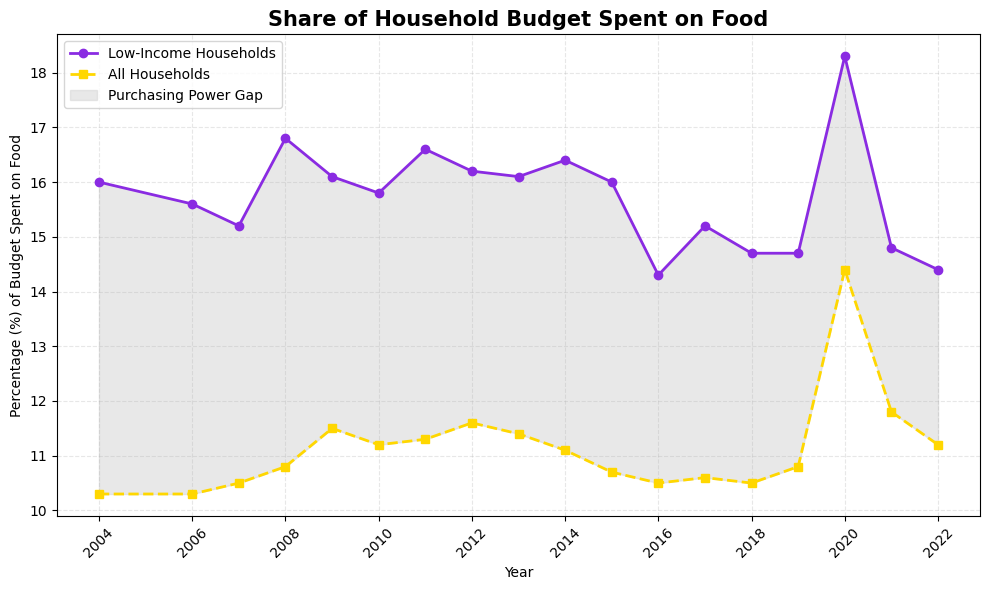

In [6]:
# Share of Household Budget Spent on Food (Part 4)

# Extract data from merged family_spending_df
food_budget_years = family_spending_df["Year"]
low_income_share = family_spending_df["Low Income Food Spend (%)"]
all_households_share = family_spending_df["All Households Food Spend (%)"]

# Income gap exist? (Why low-income group pay more for food?)
income_gap = low_income_share - all_households_share 

plt.figure(figsize=(10, 6))

# Plotting food budget % over time for both household types
plt.plot(food_budget_years, low_income_share, marker='o', linestyle='-', linewidth=2,
         label='Low-Income Households', color='blueviolet')

plt.plot(food_budget_years, all_households_share, marker='s', linestyle='--', linewidth=2,
         label='All Households', color='gold')

# Fill the gap area
plt.fill_between(food_budget_years, low_income_share, all_households_share, color='lightgrey', alpha=0.5, label='Purchasing Power Gap')

# Titles and formatting
plt.title("Share of Household Budget Spent on Food", fontsize=15, fontweight = 'bold')
plt.xlabel("Year")
plt.ylabel("Percentage (%) of Budget Spent on Food")
plt.xticks(rotation=45)
plt.grid(True, linestyle='dashed', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Analysis & Findings

##### Figure 3 demonstrates the share of household budget spent on food between 2004 and 2022, comparing low-income households to the national average. The most crucial characteristic is that low-income families consistently allocate a much higher proportion to food, often exceeding 15% of their total budget over the last two decades. During critical economic downturns, such as the COVID-19 pandemic, this proportion skyrocketed to 19%. This substantial increase occurred primarily because external shocks crippled supply chains, forcing suppliers to increase prices on their products and transfer these costs to consumers. Low-income households became particularly vulnerable as their purchasing power could not keep pace with the rising cost of living. Despite signs of economic recovery in the later stages of the pandemic, with gradually growing weekly earnings for all employees in the UK (as shown in Figure 2), the burden of food costs was not equally shared across income groups. As a result, food prices increased faster than wages, and financial stress made it difficult for them to endure the hardest time, particularly during inflationary periods. The light grey shaded area between low-income households and the national average emphasizes how this purchasing power gap creates significant inequality in their ability to afford basic necessities.

## Regression analysis: Does income level correlate with how much is spent on food in the UK (Part 5) --> Figure 4

Available sheets: ['Contents', 'Annex', 'A1', 'A2', 'A3', 'A6', '3.1', '3.1E', '3.1E5', '3.2', '3.2E', '3.2E5', '4.1', '4.2', '4.3', 'Background notes']


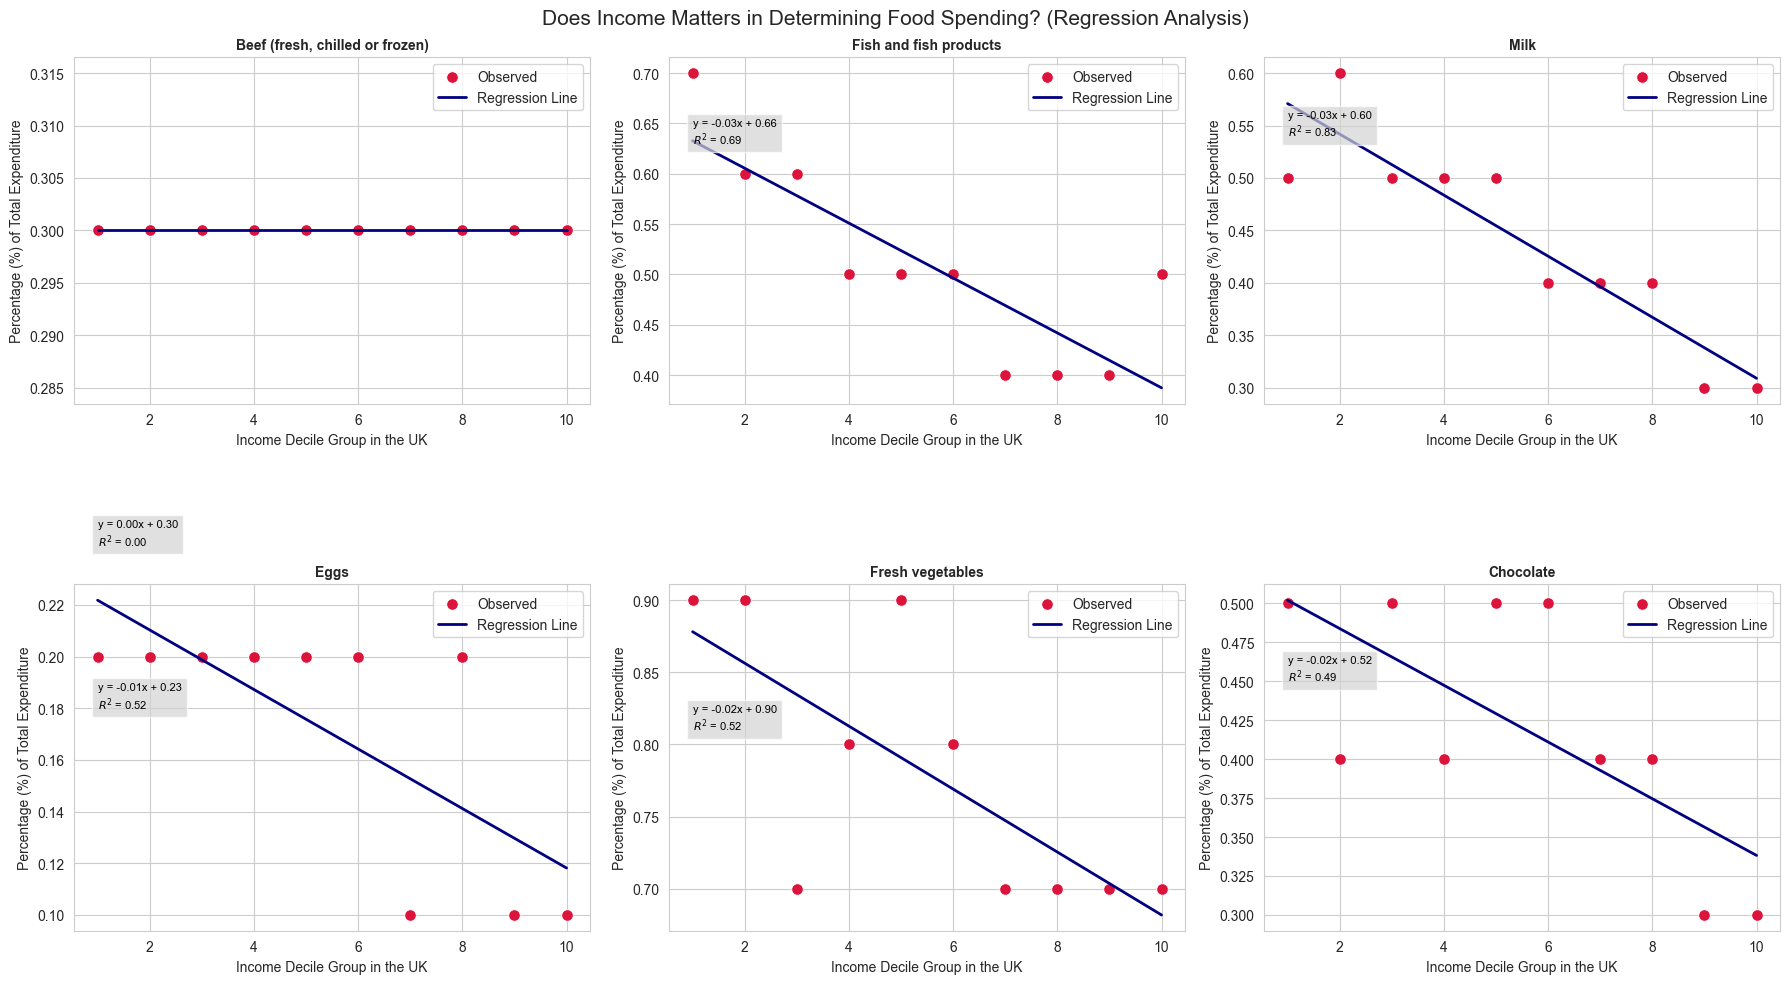

In [7]:
# ----------------------------------------------------------------------
# Regression modelling: Does income level correlate with how much is spent on food in the UK (Part 5)
# Load Weekly Food Basket Expenditure
food_trends_file = pd.ExcelFile("Detailed_expenditure_and_trends.xlsx")
print("Available sheets:", food_trends_file.sheet_names)

from sklearn.linear_model import LinearRegression

# Choose Sheet 3.2 from food_trends_file 
# Parse it to extract food spending by income group
food_spending_income_df = food_trends_file.parse("3.2", skiprows=30)            # Skip unncessary information for data extraction

# Clean and rename the relevant columns, make sure there is no matching error with the column title
food_spending_income_df.columns = [
    "Unused1", "Code", "Category", "Unused2", "Lowest", "Second", "Third", "Fourth",
    "Fifth", "Sixth", "Seventh", "Eighth", "Ninth", "Highest", "All"
]

# Select only the columns needed for the regression modelling
food_spending_income_df = food_spending_income_df[[
    "Category", "Lowest", "Second", "Third", "Fourth", "Fifth",
    "Sixth", "Seventh", "Eighth", "Ninth", "Highest"
]]

food_spending_income_df.dropna(subset=["Category"], inplace=True)               # Skip and drop values in 'Category' that are Nah 

# Choose 6 samples of food categories to represent how normal consumers will buy in a supermarket
food_categories_regression = [
    "Milk", 
    "Chocolate", 
    "Fresh vegetables",
    "Fish and fish products",
    "Eggs",
    "Beef (fresh, chilled or frozen)"
]

# Filter selected categories
selected_income_food_df = food_spending_income_df[
    food_spending_income_df["Category"].isin(food_categories_regression)
].copy()

# Convert data to long format
long_income_food_df = selected_income_food_df.melt(
    id_vars="Category",
    var_name="Income Decile",
    value_name="Weekly Spend (£)"
)

# Mapping String variables into numeric values for modelling, in which the model only accepts numeric values  
income_decile_map = {
    "Lowest": 1, "Second": 2, "Third": 3, "Fourth": 4, "Fifth": 5,
    "Sixth": 6, "Seventh": 7, "Eighth": 8, "Ninth": 9, "Highest": 10
}
long_income_food_df["Income Decile Rank"] = long_income_food_df["Income Decile"].map(income_decile_map)

# Ensure "Weekly Spend (£)" are numeric values, avoiding errors
long_income_food_df["Weekly Spend (£)"] = pd.to_numeric(long_income_food_df["Weekly Spend (£)"], errors='coerce')
long_income_food_df.dropna(inplace=True)                                        # Skip and drop values that are Nah

# Visualize regression result 

plt.figure(figsize=(18, 10))
sns.set_style("whitegrid")

# Create a for loop to loop through all the 6 samples of food category
for i, category in enumerate(long_income_food_df["Category"].unique()):
    
    # Filter data for the current category
    category_data = long_income_food_df[long_income_food_df["Category"] == category]
    
    # Configure X and Y as independent and dependent variable respectively for regression plotting
    X = category_data[["Income Decile Rank"]]
    y = category_data["Weekly Spend (£)"]

    # Basic foundation of regression modelling 
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)                                                   # Predict values

    # Extract slope (coefficent), intercept, and R² (Extra info)
    slope = model.coef_[0]
    intercept = model.intercept_
    r_squared = model.score(X, y)                                               # Add the coefficient of determination, to represents variation for spending in proportion to earnings
    
    # Subplot for each category
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x="Income Decile Rank", y="Weekly Spend (£)", data=category_data, color="crimson", s=70, label="Observed")
    
    # Titles and labels
    plt.plot(X, y_pred, color="navy", linewidth=2, label="Regression Line")
    plt.title(category, fontsize=10, fontweight = 'bold')
    plt.xlabel("Income Decile Group in the UK")
    plt.ylabel("Percentage (%) of Total Expenditure")
    plt.legend()
    
      # Add regression formula and R² on each subplot 
    plt.text(
        1, max(y)*0.9,
        f"y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.2f}",
        fontsize=8, color='black', bbox=dict(facecolor='lightgrey', alpha=0.7)
    )

# Main title for the whole Regression analysis
plt.suptitle("Does Income Matters in Determining Food Spending? (Regression Analysis)", fontsize=15)
plt.tight_layout()
plt.show()

### Analysis & Findings

##### This regression analysis focuses on the relationship between income and food spending, including several food categories as shown in Figure 4. Each individual plot exhibits that the share of total expenditure on specific food items varies across income decile groups in the UK, from the most impoverished groups (Decile 1) to wealthy groups (Decile 10). The common characteristics among these plots were that income increased while the proportion spent on food tends to decrease.

##### Take Milk and Fish products as examples, both categories show strong negative correlations between variables, with R² values of 0.83 and 0.69, respectively. The higher the coefficient of determination (R²) value is, the higher the variation of y values is accounted for by the x values, meaning that low-income households allocate a substantially larger portion of their budget to these staple food to maintain their standard of living. Same patterns could be found in Eggs, Fresh vegetables and Chocolate, these categories do not hold the same level of variation as Milk and Fish products, but their moderate negative correlation, ranging from 0.49 to 0.52, proves that Engel's Law of consumption holds true, as income rises, the proportion of income spent on food decreases. This phenomenon indicates that essential food items have become a necessity instead of a luxury from what they have witnessed in the time of economic chaos.

##### Beef unexpectedly stood out as an exception, showing no clear correlation with income (R² = 0.00). This may suggest that beef is a less consequential or more evenly consumed food across income groups, presumably due to price sensitivity from local produce or imports, religious differences, or substitution for other proteins.

##### Overall, this regression analysis strengthens the argument that food affordability continues to be a vital pressure point for low-income households. The data implies that rising food costs have an unequal impact on those who already spend a large share of their income on essentials, further widening the problems of income inequality. While wage growth may provide relief in nominal terms, the real purchasing power (adjusted with inflation) for essential goods like milk, fish, and vegetables remains highly sensitive to income, making food inflation a particularly regressive burden.

## Conclusion

##### This analysis combined regression model, web-scraping and other analytical tools to explore how food inflation varies in UK supermarket, the differences of weekly earnings between income groups, household budeget on food and the correlation between income and food spending. In conclusion, it is evident that UK suffers from continous food inflation, causing people to spend more on staples proportionately under limited cash-flow, widening the food disparities in access affordable food as a result.